## 정규표현식

In [ ]:
### 정규표현식의 기초, 메타 문자

- . ^ $ * + ? {} [] \ | ()    
<br> 
- [] 문자 클래스,    
    - \d 숫자와 매치, [0-9]와 동일한 표현식     
    - \D 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식
    - \s whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식
    - \S whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식
    - \w 문자 + 숫자와 매치, [a-zA-Z0-9]와 동일한 표현식
    - \W 문자 + 숫자가 아닌 문자와 매치, [^a-zA-Z0-9]와 동일한 표현식
    - ＼A 여러줄 검색할때도 맨앞에 매치: \A... 맨 앞의 아무문자3개 매치
    - ＼Z 여러줄 검색할때도 맨 뒤에만 매치: ...\Z 맨 뒤의 아무문자 3개 매치
- whitespace
    - 스페이스 바 (아스키코드 32)
    - ＼b 뒤로 한 칸 이동 (Backspace) (아스키코드 8)
    - ＼t 수평탭 간격 띄우기 (아스키코드 9)
    - ＼n 줄바꿈 (Linefeed) (아스키코드 10)
    - ＼v 수직탭 간격 띄우기 (아스키코드 11)
    - ＼f 프린트 출력 용지를 한 페이지 넘김 (Form feed) (아스키코드 12)
    - ＼r 동일한 줄의 맨 앞으로 커서 이동 (Carriage Return) (아스키코드 13)

- Dot(.) 메타 문자는 줄바꿈 문자인 \n를 제외한 모든 문자와 매치됨을 의미
- 반복(*) ca*t 0부터 무한대로 반복
- 반복(+) ca+t 최소 1번 이상 반복
- 반복({m,n}, ?) 반복 횟수를 제한, 반복 횟수가 m부터 n까지인 것을 매치
- ca{2}t는 c+a(2번 반복)+t의 의미
- 반복횟수가 {1,}은 1 이상, {0,}은 0 이상인 경우로 각각 +, *와 동일하며 {,1}은 반복횟수가 1 이하를 의미.
- ab?c b가 0~1번 사용되면 매치되는 것으로 ?은 앞의 b가 있어도 되고 없어도 된다
    - *? 0, 없는거 의미 ex) r.*? 은 .이 0이 되서 r만 매치
    - +? 1, 1개 있는거 의미 ex) r.+? 은 r.(dot 문자하나) 만 매치
    - ?? 0, 없는거 의미ex) r.?? 은 .이 0이 되서 r만 매치
        언제사용되는가 : 태그 분류때
        - 예시: <div>test</div><div>test2</div>
        - <div>.+</div> -> 맨앞, 맨뒤(탐욕적, 될수있는한 많이 매치) / 매치결과 <div>test</div><div>test2</div>
        - <div>.+?</div> -> 맨앞과 뒤가 나오면 즉시 매치. (게으른, 소극적 매치)/ 매치결과:<div>test</div> , 즉 ?앞의 (<div>.+)? 하나인것.
re 모듈 : 파이썬은 정규표현식을 지원하기 위해 기본으로 제공
- re.compile의 결과로 리턴되는 객체를 이용하여 그 이후 작업 수행

정규식을 이용한 문자열 검색

> match(): 문자열의 처음부터 정규식과 매치되는지 조사     
> search(): 문자열의 전체를 검색하여 정규식과 매치되는지 조사    
> findall(): 정규식과 매치되는 모든 문자열을 리스트로 리턴     
> finditer(): 정규식과 매치되는 모든 문자열을 반복 가능한 객체로 리턴    
> re.sub() : 정규 표현식을 기준으로 문자열을 분리하여 리스트로 리턴
> re.split() : 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체 -> re.sub('[^a-zA-Z]',' ',text) : text의 알파벳 외의 문자 공백으로 처리하는 의미.

In [ ]:
import re
p = re.compile('[a-z]+\s')
m = p.match('python python')
m

In [ ]:
import re
text = 'python python'
p = re.compile('[a-z]+\s')
m = p.match(text)
m   #<re.Match object; span=(0, 7), match='puthon '>

m.group()   #'python '출력됨.

In [ ]:
import re
text = 'python python'
p = re.compile('[a-z]+')  #단어들만 출력
m = p.findall(text)
m   #['python', 'python']

In [ ]:
m=p.match('33python')
print(m)   
#맨앞에 숫자라서 메치는 맨처음부터 매치 시작 <- group이나 search

In [ ]:
#Q. '12345abc'  에서 'a'만출력

text = '12345abc' 
p = re.compile('[a]')
m = p.search(text)
print(m) #<re.Match object; span=(5, 6), match='a'>
m = p.findall(text)
m #['a']

In [ ]:
text = 'abc12345Abc' 
p = re.compile('[A]')
m = p.search(text)
print(m) # <re.Match object; span=(8, 9), match='A'>
m = p.findall(text)
m  #['A']

In [ ]:
text = 'korea 대한민국힣' 
p = re.compile('[가-힣]+')
m = p.search(text)
print(m)
m = p.findall(text)
m

In [ ]:
text = 'korea 대한민국' 
p = re.compile('[가-힣]+')
m = p.search(text)
print(m)
m = p.findall(text)
m

In [ ]:
#Q.'1222333c'
text = '1222333c' 
p = re.compile('\w')
m = p.search(text)
print(m) #<re.Match object; span=(0, 1), match='1'>
m = p.findall(text)
m #['1', '2', '2', '2', '3', '3', '3', 'c']

In [ ]:
#Q.'1222222222333c'를모두 출력하세요.
import re
tex1 = '1222222333c'
p = re.compile('12{6}3{3}c')
m = p.search(tex1)
m.group()

In [ ]:
#.Q BC,CC, ABC 모두 C가 출력되는 정규 표현식을 ()에 작성하세요.
import re
pattern = re.compile(".*C$")  

text1 = 'BC'
text2 = "CC"
text3 = 'ABC'

p1 = pattern.search(text1)
p2 = pattern.search(text2)
p3 = pattern.search(text3)
print(p1)
print(p2)
print(p3)

In [ ]:
# A
pattern = re.compile("A?C")

text1 = 'AC'
text2 = "CC"
text3 = 'ABC'

p1 = pattern.search(text1)
p2 = pattern.search(text2)
p3 = pattern.search(text3)

print(p1)
print(p2)
print(p3)

In [ ]:
text = 'life is too short'
p = re.compile('[a-z]+')
p.findall(text) #['life', 'is', 'too', 'short']

In [ ]:
results = p.finditer(text)
for r in results : print(r.group()) 
#life
#is
#too
#short

In [ ]:
# finditer는 findall과 동일하지만 그 결과로 반복 가능한 객체(iterator object)를 돌려준다.
# 반복 가능한 객체가 포함하는 각각의 요소는 match 객체이다.
result = p.finditer('life is too short')
# print(list(result))
for r in result:print(r.group())

In [ ]:
#Q. '1234a 1234'에서 '1''2''3''4'를 모두 출력하세요
num = '1234a 1234'
p=re.compile('[0-9]')
m=p.finditer(num)
print(p.findall(num))    #findall 리스트로 반환값

In [ ]:
# Q. ' Python3 is very good programming language!'에서  
#['Python', 'is', 'very', 'good', 'programming', 'language']를 
text1 = 'python3 is very good programming language!'
p = re.compile('\w+')             #\w전체숫자,문자
m = p.findall(text1)
print(m)

In [ ]:
text1 = 'Python3 is very good programming language!'
p = re.compile('[a-zA-Z]+')    #대소문자전체
m = p.findall(text1)
print(m)

In [ ]:
text1 = 'Python3 is very good programming language!'
p = re.compile('[A-z]+')     #대소문자전체
m = p.findall(text1)
print(m)

In [ ]:
# match 객체
l = p.match('life ')
i = p.match( 'is ' )
t = p.match('too ')
print(l.group())
print(i.group())
print(t.group())

In [ ]:
# match 객체의 메소드
import re
p = re.compile('[a-z]+')
m = p.match('python')
print(m.group())
print(m.start())
print(m.end())
print(m.span())

print()
m = p.search('3 python')
print(m.group())
print(m.start())
print(m.end())
print(m.span())

In [ ]:
# 모듈 단위로 수행하기
m = re.match('[a-z]+', 'python')
print(m.group())

In [ ]:
# Dot(.) 메타 문자는 줄바꿈 문자(\n)을 제외한 모든 문자와 매치
import re
p = re.compile('a.+b')
m1 = p.match('a\nb')
m2 = p.match('acb')
m3 = p.match('a12?Ab')
print(m1)
print(m2)
print(m3)

In [ ]:
# re.DOTALL 옵션은 여러 줄로 이루어진 문자열에서 \n에 상관없이 검색시 사용
p = re.compile('a.b', re.DOTALL)
m = p.match('a\nb')
print(m)

In [ ]:
# 줄바꿈 문자의 조작. 일반적으로 . 도트(모든 것) * 별(0개 이상)을 컴파일하면 
# 줄바꿈 문자 \n 전까지 매치한다. 줄바꿈 문자가 있는 파일의 모든 범위를 
# 매치하려면 compile 메소드에 두번째 매개변수를 re.DOTALL 로 지정한다. 

# Q. text에서 what are you doing?만 출력하세요 
text = 'what are you doing?\nit is going to be late for school'
'\nwe need to hurry up'
regex = re.compile('.*')
mo = regex.search(text)
print(mo.group())

In [ ]:
# Q. text에서 전체문장 모두 출력하세요 
regex = re.compile('.*',re.DOTALL)
mo = regex.search('what are you doing?\nit is going to be late for school'
             '\nwe need to hurry up')
print(mo.group())

In [ ]:
# re.IGNORECASE 또는 re.I 옵션은 대소문자 구분 없이 매치를 수행시 사용
p = re.compile('[a-z]+',re.I)
print(p.match('python'))
print(p.match('Python'))
print(p.match('PYTHON'))

In [ ]:
# 대소문자를 구분하지 않고 매치시키려면 compile 메소드의 
# 두번째 매개변수를 re.I로 넘겨준다. (re 모듈의 상수다)
# Q. text에서 대소문자 구분없이 전체문장 모두 출력하세요 
text = 'Friend fRiend friEnd FRIEND'
regex = re.compile('[a-z]+',re.I)
list = regex.findall(text)
for i in list:
    print(i)
# print(list)

In [ ]:
# python이라는 문자열로 시작하고 그 뒤에 whitespace, 
#그뒤에 단어가 오는 경우
import re
p = re.compile('^python\s\w+')
data = """python one 
life is too short
python  two
you need python
python three"""
print(p.findall(data))

In [ ]:
# re.MULTILINE 또는 re.M옵션으로 ^메타 문자를 
#각 라인의 처음으로 인식시킴
import re
p = re.compile("^python\s\w+",re.M)
data = """python one 
life is too short
python two
you need python
python three"""
print(p.findall(data))

In [ ]:
# re.VERBOSE 또는 re.X : 이해하기 어려운 정규식을 주석 또는 라인 단위로 구분
# charref = re.compile(r'&[#](0[0-7]+|[0-9]+|x[0-9a-fA-F]+);')

charref = re.compile(r"""
&[#]               # Start of a numeric entity reference
(
    0[0-7]+        # Octal form
  | [0-9]+         # Decimal form 
  | x[0-9a-fA-F]+  # Hexadecimal form
)
;                  # Trailing semicolon 
""",re.VERBOSE)

In [ ]:
#Raw String - \s아닌 단어 구분자임을 알려 주기 위해 
#r'\bclass\b'처럼 Raw string임을 알려주는 기호 r을 반드시 붙여 주어야 한다.
#그렇지 않으면 역슬레시\\2개씩 이용하면됨.

In [ ]:
# 정규식 문자열 앞에 r문자를 삽입하면 Raw String 규칙에 의하여 
#백슬래시 2개 대신 1개 사용
# 파이썬 문자열 리터럴 규칙에 의하여 \\이 \으로 변경되어 \section이 전달
p = re.compile(r'\\section')

print(p.match('\section'))
p.findall('\section\section')

In [ ]:
# 메타 문자
# |(or와 동일한 의미), ^(문자열의 맨처음), $(문자열의 끝과 매치)
import re
p = re.compile('Crow|Servo')
m = p.match('CrowHello')
print(m)
print()
print(re.search('^Life', 'Life is too short'))
print(re.search('^Life', 'My Life'))
print()
print(re.search('Life$', 'Life is too short'))
print(re.search('Life$', 'My Life'))

In [ ]:
# \A(문자열의 처음과 매치. 단, re.MULTILINE 옵션 사용시 ^와은 달리 전체 문자열의 처음하고만 매치)
# \Z(문자열의 끝과 매치. 단, re.MULTILINE 옵션 사용시 ^와은 달리 전체 문자열의 끝하고만 매치)
import re
p = re.compile('\ALife', re.MULTILINE)
data = """Life is too short
Life is good
Life is valuable"""
print(p.findall(data))
print()
q = re.compile('^Life', re.MULTILINE)
data = """Life is too short
Life is good
Life is valuable"""
print(q.findall(data))
print()
p1 = re.compile('good\Z', re.MULTILINE)
data1 = """Life is too short
Life is good
Life is very good"""
print(p1.findall(data1))
print()
q1 = re.compile('good$', re.MULTILINE)
data1 = """Life is too short
Life is good
Life is very good"""
print(q1.findall(data1))

In [ ]:
# \b whitespace에 의해 구분
# \B whitespace로 구분된 단어가 아닌 경우에만 매치
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))
print(p.search('the declassified algorithim'))
print()
q = re.compile(r'\Bclass\B')
print(q.search('no class at all'))
print(q.search('the declassified algorithim'))

In [ ]:
# Q. 정규표현식을 사용하여 test에서 전화번호만  출력하세요
# text = "문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다."
import re
 
text = "문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다."
 
# regex = re.compile(r'\d+-\d+-\d+')
# regex = re.compile(r'(\d+)-(\d+)-(\d+)')
# regex = re.compile('\d{3}[-]\d{3}[-]\d{4}')
regex = re.compile(r'\b[0-9-]+\b')
print(regex.search(text))

matchobj = regex.search(text)
phonenumber = matchobj.group()
print(phonenumber)

In [ ]:
# Q. 정규표현식을 사용하여 text에서 에러가 들어간 부분만 포함하는 리스트를 출력하세요. 
# text = "에러 1122, 레퍼런스 오류, 에러 1033, 아규먼트 오류, 에러 xxx"

import re
text = "에러 1122, 레퍼런스 오류, 에러 1033, 아규먼트 오류, 에러 xxx"
regex = re.compile("에러\s\w+")
mc = regex.findall(text)
print(mc)

In [ ]:
# Q. (     )에 정규표현식을 작성하여 아래와 같이 출력하세요.
# ['1 apple', '5 oranges', '3 boys', '4 girls', '10 army', '11 mr']

import re
li = '1 apple, 5 oranges, 3 boys, 4 girls; 10 army| 11 mr'
regex = re.compile(        )   #<<채우기 문제  ('\d+\s\w+') 숫자+스페이스단어+
list = regex.findall(li)
print(list)

In [ ]:
# | (or) 
#text에서 'H,h'만 출력하세요.
text = 'Hello my friend! Life is short you need Python!'
p = re.compile('[h|H]')
p.findall(text)

In [ ]:
# 그룹핑 : 매치된 문자열 중에서 특정 부분의 문자열만 뽑아내는 경우 ()으로 만들어 준다.
# group(0) 매치된 전체 문자열, 1 첫번째 그룹, 2 두번째 그룹, n n번째 그룹
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')
print(m) #<re.Match object; span=(0, 9), match='ABCABCABC'>
print(m.group(0)) #ABCABCABC
print(m.group(1)) #ABC

In [ ]:
# 그룹핑된 문자열 재참조
# \1은 재참조 메타 문자로서 정규식의 첫번째 그룹을 지칭 
# - 2개의 동일한 단어가 연속적으로 사용되어야 매치
p = re.compile(r'(\w+)\s+\1+\s+\1+\s')
p.search('Paris in the the the spring').group(

In [ ]:
# 그룹핑된 문자열에 이름 붙이기 : 확장 구문 (?P<name>\w+)
p = re.compile(r'(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)')
m = p.search('park 010-1234-1234')
print(m.group('name'))

In [ ]:
# 그룹명을 이용하여 정규식 내에서 재참조
p = re.compile(r'(?P<word>\w+)\s+(?P=word)')
p.search('Paris in the the spring').group()

In [ ]:
# Q. 이름으로 그룹을 참조하여 'Lots of punctuation 에서 Lots를 출력하세요.
p = re.compile(r'(?P<word>\b\w+\b)')
m = p.search( '(((( Lots of punctuation )))' )
print(m.group('word'))

In [ ]:
# 전방 탐색
# 긍정(?=...) ...에 해당되는 정규식과 매치되어야 하며 
# 조건이 통과되어도 문자열이 소모되지 않음
# 부정(?!...) ...에 해당되는 정규식과 매치되지 않아야 하며 
# 조건이 통과되어도 문자열이 소모되지 않음

p = re.compile(r'.+:')
m = p.search('http://google.com')
print(m.group())
print()
p = re.compile(r'.+(?=:)')  
# :에 해당되는 문자열이 정규식 엔진에 의해 소모되지 않음(검색에는 포함되지만 결과에는 제외)
m = p.search('http://google.com')
print(m.group())
print()

In [ ]:
# 파일명+.+확장자를 나타내는 정규식
p =re.compile('.*[.].*$')
list = ['foo.exe', 'autoexec.bat', 'sendmail.cf']
for i in list:
    if p.match(i):
        print(i)

In [ ]:
# 부정적 전방탐색 이용
# 확장자가 bat 혹은 exe가 아닌 경우만 통과된다 
p =re.compile('.*[.](?!bat$|exe$).*$')
list = ['foo.exe', 'autoexec.bat', 'sendmail.cf']
for i in list:
    if p.match(i):
        print(i)

In [ ]:
# 문자열 바꾸기
# sub 메서드를 사용하면 정규식과 매치되는 부분을 
# 다른 문자로 쉽게 바꿀 수 있음
# 바꾸기 횟수를 제어하려면 세 번째 매개변수로 count 값을 넘기면 됨
# subn 역시 sub와 동일한 기능을 하지만 반환 결과를 
# 튜플로 돌려줌. 두 번째 요소는 바꾸기 발생 횟수
p = re.compile('(blue|white|red)')
print(p.sub('colour', 'blue socks and red shoes'))
print(p.sub('colour', 'blue socks and red shoes', count=1)) # 바꾸기 횟수를 제어
print(p.subn( 'colour', 'blue socks and red shoes'))

In [ ]:
# sub 메서드를 사용할 때 참조 구문을 사용
# 이름 + 전화번호의 문자열을 전화번호 + 이름으로 바꾸는 예
# sub의 바꿀 문자열 부분에 \g<그룹이름>을 사용하면 
# 정규식의 그룹 이름을 참조
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<phone> \g<name>", "park 010-1234-1234"))

In [ ]:
# 그룹 이름 대신 참조 번호를 사용할 수 있음
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<2> \g<1>", "park 010-1234-1234"))

In [ ]:
# sub 메서드의 매개변수로 함수 넣기
# hexrepl 함수는 match 객체(위에서 숫자에 매치되는)를 
# 입력으로 받아 16진수로 변환하여 돌려주는 함수 
# sub의 첫 번째 매개변수로 함수를 사용할 경우 
# 해당 함수의 첫 번째 매개변수에는 정규식과 매치된 match 객체가 입력 
# 매치되는 문자열은 함수의 반환 값으로 변환

def hexrepl(match):
    value = int(match.group())
    return hex(value)

p = re.compile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 49152 for user code.')

In [ ]:
# Greedy vs Non-Greedy
# * 메타 문자는 매우 탐욕스러워서 매치할 수 있는 
# 최대한의 문자열인 <html><head><title>Title</title> 
# 문자열을 모두 소비
# non-greedy 문자인 ?는 *의 탐욕을 제한하여 
# 최소한의 반복을 수행. *?, +?, ??, {m,n}?와 같이 사용
s = '<html><head><title>Title</title>'
print(s)
print(len(s))
print(re.match('<.*>', s).span())
print(re.match('<.*>', s).group())
print(re.match('<.*?>', s).group())
print(re.match('<.*?>', s).span())

-----------------------------------------------------------
### 0705-0706 web_crawling_기초

In [ ]:
text = "<k-digital training 3기>"
text1 = 'abc de'
print(text[0])
print(text[-1])
print(text.title())
print(text.capitalize())
print(text1.title())
print(text1.upper())
print(text1.capitalize())

In [ ]:
#과제
# "<K-digital training 3기>"
print(text[0],text[1].upper(),text[2:]) #< K -digital training 3기>
# 다른방법 뭐가있을까요...

In [ ]:
#Q. <k-digital training 3기>     ; 출력
#Q.     <k-digital training 3기>; 출력
text1 = "    <k-digital training 3기>   "

print(text1.lstrip()+text2)  #왼쪽공백제거
print(text1.rstrip()+text2)  #오른쪽공백제거

In [ ]:
#Q. <k-digital training 3기>; 출력
text1 = "    <k-digital training 3기>   "
text2 = ';'

a = text1.strip()    #strip 함수이용해서 공백 없애기
print(a+text2)
print(text1.strip()+text2)

In [ ]:
#Q. 다음을 출력하세요
#<div>k-digital training 3기</title>
#<div>k-digital training 3기</div>

text = "<title>k-digital training 3기</title>"
print(text.replace("<title>","<div>"))
print(text.replace("title","div"))
print(text.replace('title', 'div', 1))  
#뒤에 바꾸는 숫자 넣는거, 유용

In [ ]:
import re
text = ('111<head>안녕하세요</head>') #<>열어주는거</>닫아주는거
body = re.search('<head>.+</head>',text)
print(body.group())

### import requests

In [ ]:
import requests
URL = "http://naver.com"
response = requests.get(URL)
print(response.text)

In [ ]:
text = '''<meta property="og:description" 
content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>'''
q= re.compile("([가-힣]+\s?)+") #스페이스가 있거나 없거나
m= re.search(q,text)
print(m.group())

In [ ]:
text = '''<meta property="og:description" 
content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>'''
q= re.compile("[가-힣]+")
m= re.findall(q,text)  #리스트화
print(' '.join(m))

In [ ]:
#sub 이용
#Q. k-digital training 3기를 출력하세요.
import re
text = '<title>k-digital training 3기</title>'
#q=re.compile('k.+기')
t = re.sub('<.+?>','',text)
print(t)

#### 웹 문서를 가져와서 쓰려면 설치도 필요하고 모듈을 import 해서 사용해야한다
1. requests 모듈 : pip install requests 명령어로 설치, anaconda를 설치하면 기본적으로 설치되어있음.
- import requests로 모듈 호출 후 사용


In [ ]:
!conda list  #설치된 모듈 확인

In [ ]:
mport requests
URL = "http://naver.com" #네이버홈페이지
response = requests.get(URL) #requests.get(URL)
print(response.status_code) #정보를 받을 수 있는지_200 정상//404 : 에러문제 5로시작하면 서버문제.
print(response.text) #html, css, javascript_동적작동

In [ ]:
html_data = response.text
print(html_data.find('네이버')) #out : 365  #365번째
print(html_data[365:368])

In [ ]:
#Q. 네이버 메인에서 다양한 정보와 유용한 컨텐츠를
#만나 보세요 를 뽑아보세요.
html_data = response.text
print(html_data.find('네이버')) #365
print(html_data.find('요')) #396
print(html_data[365:397])

In [ ]:
# 위 문제를 정규표현식을 이용해서 출력하세요
import re
p=re.compile('([가-힣]+\s)*[가-힣]+')
m=re.search(p,html_data)
print(m.group())

In [ ]:
#split을 이용해서
content = html_data.split('<meta property=')[1] 
content = re.search('네이버', content)
print(content.group())

In [ ]:
#get 메소드에 params 인자를 넣어 함께 get 요청(파라미터 : query)
import requests
URL = "http://search.naver.com/search.naver"
params = {'query':'aa'}
response = requests.get(URL,params=params)
print(response.status_code)
print(response.text)

In [ ]:
# import requests
URL = "http://www.naver.com"               
response = requests.get(URL)
content = response.text
body = re.search('<h3.*/h3>',content)
body=body.group()
m = re.search("[가-힣]+",body)
print(body)

body1 = re.sub('<.+?>','',body)  # <>안의 어떤형태든 다 sub ,빼버림
print(body1)

### 유용한 정규표현식 re.sub('<.+?>','',body)

In [ ]:
import requests
URL = 'https://datalab.naver.com'          
response = requests.get(URL)
content = response.text
response = requests.get(URL)
html_text = response.text
temp = html_text.split('<span class="title">')[1]
print(temp.split('</span>')[0])

In [ ]:
#Q. 'http://search.shooping.naver.com/best100v2/main.nhn' 에서
# 크록스를 출력하세요
import requests
URL = 'http://search.shopping.naver.com/best100v2/main.nhn'          
req = requests.get(URL)
html = req.text
html = html.split('_popular_srch_lst_li"')[1]
html = html.split('" kwdNm=')[0]
html = html.split('="')[1]
print(html)

In [ ]:
#Q.URL = 'http://naver.com'에서 split()함수와 정규표현식을 
# 이용하여 [메일,카페,블로그,지식IN,쇼핑]을 출력하세요

import requests
URL = "http://naver.com"        
response = requests.get(URL)
html_data = response.text
content = html_data.split('<li class="nav_item"')[1:6]
body = re.findall("[가-힣]+[iN]*",str(content))
print(body)

#해설
URL = 'http://naver.com'
response = requests.get(URL)
html_data = response.text
li = []
for i in range(5):
    result = html_data.split('<li class="nav_item">')[i+1]
#     print(result)
    word = re.sub('<.*?>','',result)
    word = re.sub(r'\n','',word)
    li.append(word)
print(li)

#### import urllib
urllib모듈이란: 파이썬의 표준 모듈로써 URL을 다루기 위한 모듈 패키지    
- 설치가 필요하지 않고 import urllib로 활용
- requests 모듈과 마찬가지로 URL과 관련된 여러가지 기능들을 제공 하위모듈
- request : URL을 열고 읽는 모듈(HTTP 요청)
- error : request 모듈에서 발생하는 에러들을 포함하는 모듈
- parse : URL을 파싱하는 모듈(URL 해석 및 조작)
- robots.txt 파일을 파싱하는 모듈

URL 가지고놀기(참고 공부) - https://velog.io/@city7310/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-URL-%EA%B0%80%EC%A7%80%EA%B3%A0-%EB%86%80%EA%B8%B0

In [ ]:
import urllib
URL = 'http://www.naver.com'
request = urllib.request.Request(URL)  #대문자 유의
print(request) #<urllib.request.Request object at 0x000002E7F0872FA0>
print(request.full_url) #http://www.naver.com
print(request.type) #http
print(request.host) #www.naver.com

In [ ]:
URL = 'http://www.naver.com'
request = urllib.request.Request(URL) #객체 리턴
print(request)
response = urllib.request.urlopen(URL) #open!
byte_data = response.read(500) #<--바이트로 읽음
text_data = byte_data.decode('utf-8') #<--디코드 통해서 택스트로 바꿈
print(byte_data)
print(text_data)

In [ ]:
#웹 이미지 저장
#urllib.request.urlretrieve( ):웹상의 이미지를 폴더에 저장

import urllib.request
img_src = 'https://homepages.cae.wisc.edu/~ece533/images/tulips.png'
new_name = 'img.png'
urllib.request.urlretrieve(img_src,new_name)

In [ ]:
#단순한 패턴을 읽을 때는 복잡한 정규표현식 보다는 간단한 parse모듈을 사용합니다.
#urllib.parse : url을 6개로 분리하여 반환

URL = 'https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai'
import urllib
parse = urllib.parse.urlparse(URL)
print(parse)  
#ParseResult(scheme='https', netloc='section.blog.naver.com', path='/Search/Post.naver', params='', query='pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai', fragment='') 
print(parse[0]) #https
print(parse[5]) #fragment=''라서 ''
print(parse[:5])
print(parse.query) #쿼리부분 출력됨

In [ ]:
#유의사항
import urllib
parse = urllib.parse.urlparse('https://blog.naver.com/koreatech91;a=1?b=2#b')
print(parse)
parse[1] = 'blog.daum.net'
print(parse)
#에러가 난다. ! 튜플(변경 불가능)으로 반환되기 때문에 
#리스트(변경 가능)로 변경하여 활용해야함.

In [ ]:
#유의사항
import urllib
parse = urllib.parse.urlparse('https://blog.naver.com/koreatech91;a=1?b=2#b')
print(parse)
parse = list(parse)  #리스트로 변경
parse[1] = 'blog.daum.net' #활용가능
print(parse)

In [ ]:
# 원하는 웹사이트 requests 모듈과 urllib모듈로 가져와 text로 출력하세요.
import requests
URL = "http://pythonstudy.xyz/python/article/403-%ED%8C%8C%EC%9D%B4%EC%8D%AC-Web-Scraping"               #네이버홈페이지
response = requests.get(URL)           #requests.get(URL)
print(response.status_code)   #정보를 받을 수 있는지_200 정상//404 : 서버문제
print(response.text)
import urllib
URL = 'http://pythonstudy.xyz/python/article/403-%ED%8C%8C%EC%9D%B4%EC%8D%AC-Web-Scraping'
response = urllib.request.urlopen(URL)
byte_data = response.read()  #바이트수를 정해줘서 글씨량 정할 수 있음.
text_data = byte_data.decode('utf-8')
print(text_data)

----------------------------------------------------------------------------
0706 강의시작

### BeautifulSoup
beautifulsoup4 - 웹문서를 가져와서 가공하고 보여주는 외부모듈

In [ ]:
!pip install beautifulsoup4
#!conda list   #모듈 있는지 확인.

In [ ]:
# 홈페이지를 로컬에 파일로 저장

import urllib
request = urllib.request.Request('https://www.naver.com')
data = urllib.request.urlopen(request).read()  #바이트
#f = open('pc.html','wb')
#f.write(data)
#f.close()
with open('pc.html','rb') as f:
    data=f.read().decode('utf-8')
    print(data)

BeautifuSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웨 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음.

어떤 tag으로 구성되었는지 보고싶다면    
print(soup.prettify())

In [ ]:
from bs4 import BeautifulSoup
html = """
<html>
<head>
</head>
<body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body>
</html>
"""
soup = BeautifulSoup(html, 'html.parser')
print(soup)
h1 = soup.body.h1
p1 = soup.body.p
p2 = p1.next_sibling.next_sibling   #next_sibling : 하나의 스페이스
p_all = soup.find_all('p')
print(h1)
  
#string와 text의 차이점은?_찾아보기 : 
#text는 모든 문자열(하위 자식태그의 텍스트까지 문자열로 반환)
#string는 문자열이 없는 곳에는 None( .string 태그 하위에 문자열은 객체화)
print(h1.string) 
print(h1.text)
print(p1.string)
print(p2.string)
print(p_all)

p22 = p_all[1]
print(p22.string)

#### HTML    
html dom <<- 알아둬야함.   
dom : 문서 객체 모델(Document Object Model)   
HTML 문서에 접근하기 위한 일종의 인터페이스

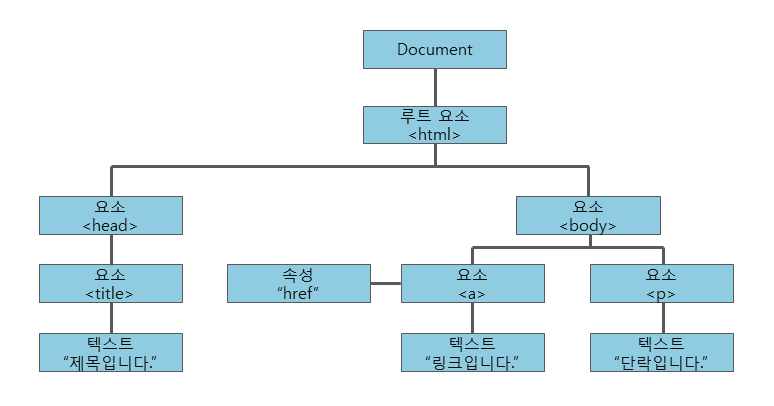
출처 : http://tcpschool.com/javascript/js_dom_concept

1. Core DOM : 모든 문서 타입을 위한 DOM 모델   

2. HTML DOM : HTML 문서를 위한 DOM 모델   

3. XML DOM : XML 문서를 위한 DOM 모델 
    
    
find() : HTML 태그에 대한 첫 번째 정보를 가져옴   
- find(속성 ='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴.

In [ ]:
# id로 요소를 찾는 방법
from bs4 import BeautifulSoup
html = """
<body>
  <h1 id = 'title'>스크레이핑이란?</h1>
  <p id = 'body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body>
"""
soup = BeautifulSoup(html,'html.parser')
#속성(id) = '값', 속성과 일치하는 값에 대한 첫번째 정보를 가져옴
title = soup.find(id='title')   
body = soup.find(id='body')
print(title.string)
print(body.string)

_________________________

In [ ]:
#**여러개의 요소 추출
from bs4 import BeautifulSoup
html = """
<html><body>
  <ul> 
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">naver</a></li>
  </ul>
</body></html>
"""
soup = BeautifulSoup(html,'html.parser')
links = soup.find_all('a')
for a in links:
    href = a.attrs['href']    #속성출력 - 대괄호 이용
    text = a.string
    print(text, ">", href) #herf :http://www.naver.com

### html tag 정리 공부

In [ ]:
#### html tag 정리 공부 : https://pridiot.tistory.com/6
> 자주 사용되는 tag

1. <html> : 웹페이지의 시작과 끝    
    - <! doctype html>  이 페이지를 html로 해석하라.     
2. <head> : 웹페이지의 정보, 문서에서 사용할 외부 파일들을 링크할 때 사용        
    - <title>, <meta> 등이 들어간다. 
3. <body> : 브라우저에 실제 표시되는 내용   
4. <title> : 문서제목        
5. <meta> : 문자 인코딩 및 문서 키워드, 요약정보    
    - <meta charset="utf-8">  웹페이지의 문자 인코딩 방식을 utf-8로 지정하라.    
6. <div> : 아무런 의미X, 컨텐츠들을 어떤 목적에 따라 묶어야 할 때 사용.    
7. <span> : 아무런 의미X, 컨텐츠들을 어떤 목적에 따라 묶어야 할 때 사용.        
    * <div> 와 <span>의 차이    
    <div>  block lever element(줄 바꿈 O)    
    <span>  inline lever element(줄 바꿈 X)    
8. <a> : anchor, 웹 페이지나 외부 사이트 연결    
    - <a href="연결할 링크의 경로">내용</a>    
    - href="#"은 실제로 연결되지 않는, 링크 역할만 하도록 만든 것. 널 링크(null link)라고 함.    
    - ![image.png](attachment:image.png)    
    > 'a'에서 사용할 수 있는 속성 값
    1) target : 새창 or 새 탭에서 링크를 열때 사용
        _blank 새로운 탭 or 창
        _self 현재 탭 or 창
        _parent 현재 화면을 불러낸 부모 탭 or 창, 없으면 현재 탭 or 창
        _top 최상위 탭 or 창, 없으면 현재 탭 or 창
    2) title : 링트의 툴팁을 표시(커서를 올렸을 때 나오는 설명)
        <a href="연결할 페이지나 사이트 경로" title="링크 내용에 대한 설명"
    3) id : 같은 페이지 안에서 이동할 때 사용
        - 이동하고 싶은 위치마다 id속성을 이용하여 앵커를 만든다.(각각 다른 이름으로 지정해야 함.)
        <a id="앵커이름">내용</a>
        - 이름 붙여놓은 앵커들을 다시 <a>의 href속성으로 연결.
        <a href="앵커이름">내용</a>
9. <script> : 코드 삽임
    - 실행 가능한 코드를 웹 페이지에 포함시키거나 참조하기 위해서 사용.
    - 보통 Javascript 코드를 넣을 때 사용.
10. <link> : 외부 파일을 연결할 때 사용
    <link href="외부 CSS파일 경로" rel="stylesheet" type="test/CSS">
    rel="stylesheet"는 연결할 파일이 stylesheet 라는 의미
    type="test/CSS"는 스타일시트 코드가 텍스트 파일로 된 css유형이라는 의미
    * CSS 사용할 때 <link>와 <style> 차이
    : <link>는 외부 css파일을 연결할 때, <style>은 css설정을 같은 웹페이지 안에서 정의할 때 사용.(<head>사이에 정의)
11.<img> : 이미지 삽입
    - <img src="이미지 경로">
    - 태그 하나당 1개의 이미지 삽입 가능
    - img의 속성 : width(너비), height(높이), alt(이미지를 설명해 주는 대체 텍스트 추가),title(툴팁;커서올렸을 때 나오는거),usemap(이미지 맵(하나의 이미지에 여러 링크를 만드는 것))
12.<p> : 단락
    - 앞,뒤로 빈 줄이 생기면서 단락이 생긴다.
13.<li> : <ul>과 <ol>안에서 각 항목을 나열할 때 사용.
    <ul>                    <ol[속성="속성 값"]>
      <li>내용</li>           <li>내용</li>
      <li>내용</li>           <li>내용</li>
    </ul>                   </ol>
14.<ul> : unordered list, 순서가 없는 list
    + <ol> : olordered list, 순서가 있는 list
        - type : 1,a,A,i,I
        - start : 중간부터 시작해야 할 때 이 속성을 사용.
        - reversed : 역순으로 할 때 사용.
15.<style> : 스타일 정보를 정의할 때 사용.<head>사이에 정의.
16.<br> : 줄바꿈, 닫는태그 없음!
17.<hn> : 제목,<h1>~<h6>까지 1이 크기가 제일 큼.
18.<input> : form의 요소중 하나. 사용자가 정보를 입력하는 부분을 만들어야 할 때 사용한다.
    - type에 따라 어떤 형식으로 정보를 받을지 결정, id값을 통해 구별 가능.
    - input 속성 : readonly(일기전용),placeholder(힌트표시)
    - 
    - 
19.<form> : form 생성
20.<iframe> : 외부 페이지 삽입
    - width, height : 너비, 높이(픽셀갑)
    - name : 프레임 이름
    - seamless : 테두리 없애기, 속성값 없이 seamless만 사용.
    - src : 프레임에 표시할 페이지의 주소 지정.
21.<nav> : 문서 연결 링크, 같은 사이트 안의 페이지나 다른 사이트의 페이지로 연결.
22.<strong> : 중요한 내용 강조를 위해 진하게 표시
    - <b> : 의미없이 진하게 표시
    - <em> : 내용의 강조를 위해 기울임 표시
    - <i> : 의미없이 기울임
        
23.<footer> : 제작 정보와 저작권 정보
    + <address> : 사이트 제작자 정보, 연락처 정보, 웹사이트 관련된 주소 넣을때 사용
24.<header> : 제목 지정
    + <head>와는 다름!
    - <head> : <title>나<meta>등의 웹페이지 정보가 들어감, 1번밖에 못씀
    - <header> : 문서에서 여러번 사용 가능.
25.<button> : 버튼
    - <input type="button">해서 생성 가능
    - 컨텐츠를 포함할 수 있어서 시각적 효과 줄 수 있다.
    - 버튼속성:
        - submit : from 제출 <button type="submit"> _전송_ </button>
        - reset : from 리셋 <button type="reset"> _다시쓰기_ </button>
        - button : 버튼의 형태만 만든다. 동작 실행하려면 함수와 연결 필요
26.<i> : 묶어진 내용 기울임.    
    
27.<b> : bold, 진하게
    - 묶인 내용들이 굵게 표시됨
28.<aside> : 본문 이외의 내용
    - 블로그 양 옆의 공고나 링크 같은 사이드 바를 표시할 때 사용
    - 필수요소가 아니여서 필요한 경우 이용
    + <section>과 <article>의 차이
    - <section>: 맥락에 따라 주제별로 컨텐츠 묶을 때 사용
    - <article>: 독립된 내용의 실제 컨텐츠 내용들을 넣을 때 사용
    - <article>은 실제 내용들이 들어가고 <section>은 header, section, footer와 구분하기 위한 기능으로 사용
       
        
--- 기타 Tag ---
- 주석 :사람이 보기 위한 내용
    * html의 주석 : <!--주석내용-->
    * CSS의 주속 : /*주석내용*/
- 시멘틱 태그(semantic tag) : 사람이 이해하기 쉽도록 태그의 이름만 보고도 역할이나 위치를 알 수 있도록 만든 태그들

[시멘틱 태그(semantic tag)]

form, table, img, 등이 있으며, HTML5에서 추가된 시맨틱 태그는 아래와 같다.     
<br>
header : 헤더를 의미    
nav : 네비게이션을 의미,콘텐츠를 담고 있는 문서를 사이트간에 서로 연결하는 링크   
aside : 사이드바, 사이드에 위치하는 공간, 본문 이외의 내용을 담음      
section : 본문 내용(article)을 담음   
article : 실질적인 내용     
footer : 화면의 구조 중 제일 아래에 위치하고, 회사소개 / 저작권 / 약관 / 제작정보      
div : 글자나 사진등 콘텐츠들을 묶어서 CSS 스타일을 적용시킬때 사용     
<br>

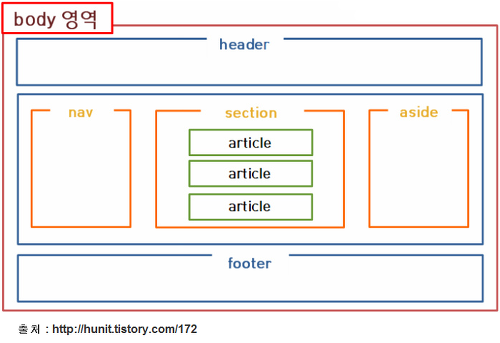

In [ ]:
# 기상청 사이트 주소 - http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp
#find 써서 타이틀과 wf 찾아서 출력하기.
import urllib
URL = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
request = urllib.request.Request(URL)
response = urllib.request.urlopen(URL)
byte_data = response.read()
text_data = byte_data.decode('utf-8')
#find('title')
#find('wf')
from bs4 import BeautifulSoup
html = text_data
soup = BeautifulSoup(html,'html.parser')
title = soup.find('title')   #find는 처음거 찾는다.
wf = soup.find('wf')
print(title.string)    
print(wf.string)

In [ ]:
import urllib
URL = 'https://www.naver.com'
request = urllib.request.Request(URL)
response = urllib.request.urlopen(URL)
byte_data = response.read()
text_data = byte_data.decode('utf-8')
from bs4 import BeautifulSoup
html = text_data
soup = BeautifulSoup(html, 'html.parser')    
#HTML Parse란 HTML 문법 규칙에 따른 문자열을, 
# 해당 문법을 바탕으로 단어의 의미나 구조를 
#분석하는 것을 의미
title = soup.find('title')
print(title.string)

find_all():
- HTML 의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능.
- CSS 속성으로 필터링(class_(생략가능)/#class는 언더바(_)필수/로 클래스를 직접 사용. 혹은 attrs(속성)에서 속성=값으로 필터링.

In [ ]:
#클래스 속성으로 가져오기
import requests
from bs4 import BeautifulSoup
req = requests.get('https://www.naver.com')
html = req.text  #text로 가져옴
#print(html)
soup = BeautifulSoup(html,'html.parser')
result = soup.find_all('a',class_='link_set') #class 는 'a'태그의 속성
#print(result)
result1 = soup.find_all('a',class_="_2aeXMlrb BMgpjddw")  
print(result1)

In [ ]:
print(soup.title) #<title>NAVER</title>
print(soup.title.name)# title
print(soup.title.string) #NAVER
print(soup.img) #alt 이미지속성 
print(soup.img['alt'])  #속성검색할땐 대괄호
print(soup.a)
print(soup.a['href']) #a 의 href 속성을 검색함
print(soup.a.string)

In [ ]:
#limit 옵션으로 요소개수지정
print(soup.find_all('a',limit=2))  

In [ ]:
#find_all리스트의 인덱스지정사용법
print(soup.find_all('a')[1])

In [ ]:
#id 이용해서 리스트 뽑기
print(soup.find_all('div', id = 'u_skip'))  

In [ ]:
print(soup.find_all('span',class_='blind',limit = 2))

In [ ]:
#속성에서 클래스가 블라인드인 항목만, 딕셔너리형식으로 넣어주면
# 해당 항목 리스트로 출력, limit 제한 2 뒀음
print(soup.find_all('span',attrs={'class':'blind'},limit = 2)) 

In [ ]:
#속성에서 항목 여러개 찾기 가능
print(soup.find_all('span',attrs={'class':['blind','item']},limit = 10))

In [ ]:
import re
print(soup.find_all(string='네이버')) #only 네이버
print(soup.find_all(string=re.compile('네이버'))) #네이버포함된거까지 모두

select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 .으로 id는 #로 표시

In [ ]:
from bs4 import BeautifulSoup
html = """
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>
"""
soup = BeautifulSoup(html,'html.parser')
h1 = soup.select_one('div#meigen > h1').string 
#괄호 안의 #은 id 뜻함.
print(h1)
li_list = soup.select('div#meigen > ul.items > li') 
#괄호 안의 .은 클래스 뜻함
# li_list
#[<li>유니티 게임 이펙트 입문</li>,
# <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>,
# <li>모던 웹사이트 디자인의 정석</li>]
# print(li_list)
# [<li>유니티 게임 이펙트 입문</li>, <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>, <li>모던 웹사이트 디자인의 정석</li>]

for li in li_list:
    print(li.string)
    #유니티 게임 이펙트 입문
    #스위프트로 시작하는 아이폰 앱 개발 교과서
    #모던 웹사이트 디자인의 정석
    

In [ ]:
# 미국환율가져오기 https://finance.naver.com/marketindex/
import requests
from bs4 import BeautifulSoup
req = requests.get ('https://finance.naver.com/marketindex')
html = req.text
soup = BeautifulSoup(html,'html.parser')
value = soup.find_all('span',class_='value')[0].string
# print(soup.find('span',class_='value').string)
print('usd/krw =',value)

In [ ]:
#파일 열어서 parser
from bs4 import BeautifulSoup
fp = open('fruits-vegetables.html',encoding = 'utf-8')
soup = BeautifulSoup(fp,'html.parser')
print(soup)

In [ ]:
#출력 연습
print(soup.select_one('ul#ve-list > li.white').string) #무
print(soup.select_one('div#main-goods > h1').string) #과일과 야채

In [ ]:
#<li class="black" data-lo="us">아보카도</li>
#서로 다른 방법으로 아보카도를 5번 출력하세요.
print(soup.select('ul#ve-list > li.black')[1].string)
print(soup.select_one("#ve-list > li:nth-of-type(4)").string)
print(soup.find_all('li', attrs={'class':'black','data-lo':'us'})[0].string)
print(soup.find_all('li', class_='black')[1].string)
print(soup.find(attrs={'class':'black','data-lo':'us'}).string)
print(soup.select('ul#ve-list > li[data-lo="us"]')[1].string)
#print(soup.find(id="ve-list").find("li",cond).string)

In [ ]:
#Q. 정규표현식과 BeautifulSoup을 이용하여 https가 포함된 url만 출력하세요.
from bs4 import BeautifulSoup
import re #정규표현식을 사용할 때 --- (※1)
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa*</li>
</ul>
"""
p = re.compile('^https')  #'^ '시작부분,/ [^]에서는 반대의미
soup = BeautifulSoup(html, 'html.parser')
list_find = soup.find_all('a', attrs={'href':p})
for find in list_find:
    print(find['href'])

In [ ]:
#간단하게 만들기
soup = BeautifulSoup(html, 'html.parser')
list_find = soup.find_all(href=re.compile('https'))
for find in list_find:
    print(find['href']) #href 라는 속성을 출력._ 속성[]대괄호 이용

In [ ]:
#Q. 'https://www.naver.com'으로 부터
#<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>을 출력하세요.
import requests
from bs4 import BeautifulSoup
req = requests.get('https://www.naver.com')
html = req.text 
soup = BeautifulSoup(html,'html.parser')

print(soup.select('a', herf='#newsstand')[0]) 
#.string 추가해서 뒤에 붙여주면 '뉴스스탠드 바로가기' 글씨만 출력
print(soup.select_one('a', herf='#newsstand'))
print(soup.find(href=re.compile('#newsstand')))
print(soup.find_all(href=re.compile('#newsstand'))) # find_all 리스트로 출력

In [ ]:
! pip install lxml

In [ ]:
# <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>을 출력
# lxml 이용.
import requests
from bs4 import BeautifulSoup
req = requests.get('https://www.naver.com')
html = req.text 
soup = BeautifulSoup(html,'lxml')
print(soup.select_one('a'))

In [ ]:
# prettify() 함수를 이용하면 보기 좋게 출력할 수 있음
from bs4 import BeautifulSoup
html = """<html> <head><title>test site</title></head>\
<body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>"""
soup = BeautifulSoup(html, 'html.parser')
soup.prettify()

In [ ]:
#### 과제_0706

In [ ]:
#Q1. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요.
import requests
from bs4 import BeautifulSoup
req = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.nhn')
html = req.text 
soup = BeautifulSoup(html, 'html.parser')
print(soup.find(href="/movie/bi/mi/basic.nhn?code=194205").string)

# A
a = soup.select_one('div.tit3 > a')
print(a.string) 

In [ ]:
#Q2. 네이버 영화 랭킹 가져와서 전체 영화제목을 출력하세요.
import requests
from bs4 import BeautifulSoup
req = requests.get("https://movie.naver.com/movie/sdb/rank/rmovie.nhn")
html = req.text
soup = BeautifulSoup(html,'html.parser')
movies = soup.find_all('div' , class_="tit3")

i=0
for movie in movies:
    i = i+ 1
    print('랭킹순위 {} : {}'.format(i, movie.a['title']))

In [ ]:
# Q3."http://api.aoikujira.com/time/get.php"으로 부터 아래와 같이 출력하세요.
# 2020/08/02 08:06:45 - #text_data < urllib
# b'2020/08/02 08:06:45' - #byte_data <urllib

import urllib
URL = 'http://api.aoikujira.com/time/get.php'
request = urllib.request.Request(URL)
data = urllib.request.urlopen(URL)
#data = urllib.request.urlopen(request).read()
byte_data = data.read()
text_data = byte_data.decode('utf-8')

import requests
req = requests.get('http://api.aoikujira.com/time/get.php')
html = req.text 
print(html)

개인공부 - 크롤링공부

In [ ]:
import requests as rq
url = 'https://www.naver.com'
response=rq.get(url)
data = response.text

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data,'html.parser')
print(soup.body.p)    
#url의 정보를 쪼갠것 중 body의 p / 객체.태그이름.하위태그 <<<접근가능

In [ ]:
#객체.태그['속성이름']
print(soup.a['href'])

In [ ]:
#객체.name
## name 변수
print(soup.title.name)  # title의 변수는 title

In [ ]:
#객체.string
## string 변수(참고) Navigablestring: 문자열은 태그 안의 
# 텍스트에 상응한다.<< BeautifulSoup는 이 클래스를 포함.
print(soup.title.string) #<<태그 안의 <title='NAVER'> 문자열 출력.

In [ ]:
#객체.contents
##태그의 자식들을 리스트로 반환
print(soup.contents)

In [ ]:
#find() : 테그 하나만 가져옴

'''find(name,attrs,recursive,string,**kwargs)

[옵션]
name - 태그이름
attrs - 속성(딕셔너리로)
recursive - 모든자식 or 자식
string - 태그 안의 문자열
keyword - 속성(키워드로)

※(주의) class는 파이썬 예약어이므로, class_를 사용'''

print(soup.find('a',attrs={'class':'link_jrnaver'}))

#find_all() : 해당 태그가 여러개 있을 경우 한꺼번에 모두 가져온다. 그 객체들의 리스트로 반환한다.
'''
find_all(name,attrs,recursive,string,limit,**kwargs)
[옵션]
limit - 몇 개까지 찾을 것인가?, 제한두는 인자'''

print(soup.find_all('a',limit=2))

##### 파이썬 생활밀착형 프로젝트, 지은이 김효실, 출판사 : 로드북

#### 네이버 영화 리뷰 크롤링

영화'10 Things I Hate About You' 리뷰 제목 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://movie.naver.com/movie/bi/mi/review.nhn?code=28899'
res = requests.get(url)
data=res.text

#파싱
soup=BeautifulSoup(data,'html.parser')

#리뷰 리스트
ul = soup.find('ul',class_="rvw_list_area")
lis = ul.find_all('li')
#print(lis)
#리뷰 제목 출력
count=0
for li in lis:
    count += 1
    print(f"[{count}th]",li.a.string)

----------------------------------------------------------------------
### 0712 셀레니움

### selenium 모듈
- 웹 어플리케이션 테스트를 위한 프레임 워크 :  홈페이지 테스트용으로 사용
- 사용자가 아닌 프로그램이 웹 프라우저를 제어할 수 있도록 지원
- 웹 브라우저 마다 클라이언트 프로그램(Web Driver)이 별도로 필요(웹프라우저 <->프로그램간 통신 목적)
- 크롤링 보다는 웹을 제어하는 목적이 더 큼
- pip install selenium
- web driver설치(크롬 버전 확인) : https://chromedriver.chromium.org/downloads
- 압축 해제한 후 chromedriver.exe를 적당한 경로로 이동
selenium 모듈 호출 후 설치한 web driver 경로를 지정

이벤트로 제어하기 : 브라우저를 직접 제어하기 때문에 직접 컨트롤하여 마우스 클릭, 키보드 입력, 자바 스크립트 이벤트 처리 가능
- 마우스 클릭 : click()
- 키보드 입력 : send_keys()
- 자바스크립트 삽입 : execute_script()
- 입력 양식 전송 : submiit()
- 스크린샷 : screenshot(파일이름)
- 글자 지움 : clear()
- 뒤로 가기 : back()
- 앞으로 가기 : forward()

In [ ]:
!pip install selenium

In [ ]:
import selenium
from selenium import webdriver

## 웹브라우저 띄우기
url = 'https://www.naver.com'
path = 'C:/tool/chromedriver.exe'  #드라이버 위치
driver = webdriver.Chrome(path)  
driver.get(url)   #웹브라우저가 뜬다.

In [ ]:
driver.close() #드라이버 닫힘

In [ ]:
driver.maximize_window() #창 크게

In [ ]:
driver.minimize_window() #창 최소화

In [ ]:
print(driver.current_url) #현재 url 얻기

In [ ]:
driver.implicitly_wait(time_to_wait=5) 
#Implicit Waits(암묵적 대기) Default 값은 0이다. 위의 예시는 5초

# implicitly wait (웹페이지 전체가 넘어올때까지 기다리기) 와 
# explicitly wait (웹페이지의 일부분이 나타날때까지 기다리기) 

#### 셀레니움 함수
- find_element(s)_by_id : id 속성을 사용하여 접근
- find_element(s)_by_class_name : 클래스를 사용하여 접근
- find_element(s)_by_name : name속성을 사용하여 접근      
find_element_by_name : 태그 name으로 특정한 태그를 찾을 수 있음     
- find_element(s)_by_tag_name :태그를 사용하여 접근       
find_element_by_tag_name() : 최초 발견한 태그만 가져오기       
- find_element(s)_by_xpath : xpath속성을 사용하여 접근
- find_element(s)_by_link_text : 앵커태그(a태그)에 사용되는 텍스트로 접근
- find_element(s)_by_partial_link_text : 앵커태그(a태그)에 사용되는 일부 텍스트로 접근
- find_element(s)_by_css_selector : CSS선택자를 사용하여 접근

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

#웹드라이버 객체생성
driver = webdriver.Chrome('C:/tool/chromedriver.exe') #드라이버 위치 넣기

url = "https://www.google.co.kr"
driver.get(url) #크롬 창 띄우기

#검색창
search_box = driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')

#검색할거 입력
search_box.send_keys('빅데이터')
#입력하고 엔터
search_box.send_keys(Keys.RETURN)
#검색하고 요소 가져오기
elements = driver.find_elements_by_xpath('//*[@id="rso"]/div/div/div/div/a/h3'
#검색하고 위의 요소들
#하나씩 프린트
#파일로저장
for e in elements:
    print(e.text)
    print(e.text, file=open('dataset/test_sel.txt','a',encoding='utf-8'))
#//*[@id="rso"]/div[2]/div/div/div[1]/a/h3 <<< 여기서 여러개 가져오려고 뒤의 div뒤 번호지움
time.sleep(3)
driver.close()

### 과제

In [ ]:
# 과제  _ 상위열개
# Q. 구글 검색에서 '이대역 맛집' 을 찾아 상위 10개만 출력 및 저장하세요.(셀레니움 이용)

driver = webdriver.Chrome('C:/tool/chromedriver.exe')
url = "https://www.google.co.kr"
driver.get(url)
search_box = driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_box.send_keys('이대역 맛집')
search_box.send_keys(Keys.RETURN)
elements = driver.find_elements_by_xpath('//*[@id="rso"]/div/div/div/div/a/h3')

count = 0
for e in elements:
    print(e.text)
    print(e.text, file = open('dataset/test2_sel.txt','a',encoding='utf-8'))
    count +=1
    if count > 10: break
        
time.sleep(1)
driver.close() #현재 탭 닫기.
#driver.quit()  #브라우저 닫기


driver.close() #현재 탭 닫기    
driver.quit()  #브라우저 닫기     
driver.back() #뒤로가기     
driver.forward() #앞으로가기    
driver.window_handles[0] #브라우저 탭 객체를 리스트로 반환. [0] 은 인덱싱. 첫번재 탭을 의미     

driver.switch_to.window(driver.window_handles[0]) #첫번째 탭으로 이동     
driver.switch_to.window(driver.window_handles[1]) #두번째 탭으로 이동     
driver.switch_to.window(driver.window_handles[2]) #세번째 탭으로 이동    

driver.switch_to.window(driver.window_handles[0]) #닫을 탭으로 이동 후      

driver.close()     

driver.find_element_by_id('ke_kbd_btn').click() #엘레먼트 클릭     
driver.find_element_by_id('ke_awd2_btn').send_keys('텍스트 입력')#텍스트 입력   

출처 : https://pythondocs.net/selenium/%EC%85%80%EB%A0%88%EB%8B%88%EC%9B%80-%ED%81%AC%EB%A1%A4%EB%9F%AC-%EA%B8%B0%EB%B3%B8-%EC%82%AC%EC%9A%A9%EB%B2%95/

In [ ]:
#네이버 드라이버 객체 만들고 네이버 홈페이지 불러오기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('C:/tool/chromedriver.exe')
url = "https://www.naver.com"
driver.get(url)
driver.maximize_window()
#seatch_box = driver.find_element_byxpath()
#로그인 이동 -> 홈 이동

import time
driver.find_element_by_class_name('link_login').click()
time.sleep(2)
driver.back() #전 화면으로

In [ ]:
#앞화면으로
driver.forward()

In [ ]:
#새로고침 -> 홈 이동
driver.refresh() #새로고침
time.sleep(2)
driver.back()

In [ ]:
#검색어 입력
elem = driver.find_element_by_id('query')
elem.send_keys('빅데이터')
elem.send_keys(Keys.ENTER)  #ENTER, RETURN 둘다가능

In [ ]:
#'a'태그
elem = driver.find_element_by_tag_name('a')
elem

In [ ]:
#모든 a 태그의 href 속성 출력
elems = driver.find_elements_by_tag_name('a')
for e in elems:
    print(e.get_attribute('href'))

In [ ]:
#모든 a 태그의 href 속성 출력
elems = driver.find_elements_by_tag_name('a')
for i, e in enumerate(elems):
    if i < 5:
        print(e.get_attribute('href'))
    else : pass

In [ ]:
# 다음 사이트로 이동
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get("http://www.daum.net")

In [ ]:
# 검색어 이동
elem = driver.find_element_by_name('q')
elem.send_keys('빅데이터')
elem.send_keys(Keys.RETURN)

In [ ]:
driver.back()

In [ ]:
elem = driver.find_element_by_name('q')
elem.send_keys('빅데이터')
elem = driver.find_element_by_xpath('//*[@id="daumSearch"]/fieldset/div/div/button[2]').click()
#elem.click()

In [ ]:
driver.refresh()

In [ ]:
#뉴스 출력
elem = driver.find_element_by_css_selector('#container > li:nth-child(1) > div.wrap_cont > a')
elem.text

In [ ]:
#뉴스 다수 출력
elems = driver.find_elements_by_css_selector('#container > li> div.wrap_cont > a')
for e in elems:
    print(e.text)

In [ ]:
driver.close()

In [ ]:
# 과제
#뉴스 타이틀 링크 1개 가져오기

In [ ]:
# 과제
#뉴스 타이틀 링크 모두 가저오기

In [ ]:
from selenium import webdriver

url = 'https://www.naver.com'
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)

In [ ]:
selected_link = driver.find_element_by_link_text('경제M')
print(selected_link)
print(selected_link.tag_name)
print(selected_link.text)

In [ ]:
selected_link = driver.find_element_by_partial_link_text('원조') #일부만 적어도 전체 발췌
print(selected_link)
print(selected_link.tag_name)
print(selected_link.text)

In [ ]:
# 과제
# 네이버 사이트에서 15개 selenium 함수를 이용하여 요소를 가져와서 출력하세요(15개)

In [ ]:
# requests + bs4
import requests
from bs4 import BeautifulSoup

url = 'https://naver.com'
response = requests.get(url)
html = response.text

bs = BeautifulSoup(html, 'lxml')
##themecast > div.theme_cont > div:nth-child(1) > div > ul > li:nth-child(1) > a.theme_info > strong
##themecast > div.theme_cont > div:nth-child(1) > div > ul > li:nth-child(4) > a.theme_info > strong
titles = bs.select('#themecast > div.theme_cont > div > div > ul > li > a.theme_info > strong')
for i, t in enumerate(titles):
    if i < 5:
        print(t.text)
    else: pass

In [ ]:
#자바스크립트 실행
from selenium import webdriver
url = 'https://www.naver.com'
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)
driver.execute_script('alert("test")') #alert:경고창/경고창이 뜬다 -> 자바스크립트

로그인 하기위해 필요한 부분 자바스크립트, 틈날때 공부하기

In [ ]:
#파이썬과 스크립트가 같이있을때 어떻게 작동하는지
#스크립트 부분이 완전히 실행되기 전에 10라인이 실행됩니다.
#즉, 파이썬은 스크립트를 주는 즉시 다음 코드 실행!
#끝날때까지 기다리지 않음
from selenium import webdriver
url = 'https://www.naver.com'
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)
driver.execute_script('alert("test")')

for i in range(0,10):
    print(i, end=' ')

## selenium으로 page_source 가져오기

In [ ]:
#page_source 속성을 이용해여 자바스크립트가 저리된 코드를 가져옴.
from selenium import webdriver
url = 'https://www.naver.com'
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)
print(driver.page_source) 
#페이지 소스 가져와서 찾고싶은 정보 여기서 찾으면 됨.

#셀레니움으로 가져온 정보를 BeautifulSoup를 이용해 처리할 수 있다.

In [ ]:
#requests로 처리하기 힘든 JavsScript를 처리하고(셀레니움으로) 
#만들어진 html은 bs를 이용하여처리할 수 있다.
#- 셀레니움 메모리 용량 많이 들기 때문

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

url = 'https://www.naver.com'

driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)
bs = BeautifulSoup(driver.page_source, 'html.parser')
#print(bs)
titles = bs.select('#themecast > div.theme_cont > div > div > ul > li > a.theme_info > strong')
for i, t in enumerate(titles):
    if i < 5: print(t.text)
    else: pass
driver.close()

### 웹브라우저 화면캡쳐

In [ ]:
#web browser 화면캡쳐
from selenium import webdriver
url = 'https://www.naver.com'
driver = webdriver.Chrome('C:/tool/chromedriver.exe')
driver.get(url)
#가져온 사이트를 캡쳐해 저장하는 것
driver.get_screenshot_as_file('dataset/naver.png')
#True 면 실행됨

------------------------------

In [ ]:
#Q.네이버 사이트에서  " 화이트 인테리어의 진수"를 class_name을 이용하여 
#가져와서 출력하세요
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('C:/tool/chromedriver.exe')
url = "https://www.naver.com"
driver.get(url)

elem = driver.find_element_by_class_name('title.elss')
print(elem.text)

In [ ]:
#Q.네이버 사이트에서  strong태그를 이용하여 모든 텍스트를 가져와서
#가져와서 출력하세요
tags = driver.find_elements_by_tag_name('strong')

for t in tags:
    print(t.text)

In [ ]:
#Q.네이버 사이트에서  id를 이용하여 다음을 출력하세요.
#뉴스스텐드
#구독한 언론사 전체언론사
#리스트형
#썸네일
#설정

ids = driver.find_element_by_id('NM_NEWSSTAND_TITLE')
print(ids.text)

In [ ]:
# Q. selenium + bs4로 네이버 사이트에서 뉴스 5개를 가져와서 출력하세요.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome('C:/tool/chromedriver.exe')
url = "https://www.naver.com"
driver.get(url)
time.sleep(3)
driver.find_element_by_xpath('//*[@id="NM_NEWSSTAND_view_buttons"]/a[1]/i').click()
time.sleep(3)
bs = BeautifulSoup(driver.page_source, 'html.parser')

titles = bs.select('#NM_NEWSSTAND_DEFAULT_LIST > div.list_view > div._NM_NEWSSTAND_ARTICLE_CONTAINER > div > div.news_box > div.sub_news > ul > li > a')
time.sleep(2)
for i,t in enumerate(titles):
    if i < 5:
        print(t.text)
    else : pass

#### 과제

In [ ]:
# 과제
# Q. urllib + bs4로 네이버 사이트에서 뉴스 5개를 
# 가져와서 출력하세요.
import urllib

url = 'https://news.naver.com'
request = urllib.request.Request(url)
response = urllib.request.urlopen(url)
byte_data = response.read()
text_data = byte_data.decode('utf-8')
text_data

In [ ]:
# 과제
# Q. selenium으로 네이버 사이트 접속 후 5개 내부 사이트로 이동하면서 
# 10개의 요소를 선택 후 출력한 수 드라이버를 클로즈하세요. 단, 10개의 요소는
# 텍스트, 링크를 포함

In [ ]:
# 과제
# Q. 네이버 항공권 검색 > 제주도 특정일 편도 첫번째 항공권 정보 가져오기